# Malaysia Power – Fuel Mix Analysis

This notebook connects to `malaysia_power.db` and calculates the monthly fuel mix
for Malaysia's power generation. It uses `fact_generation_monthly`, `dim_fuel`,
and `dim_date_month` to produce a stacked bar chart of MWh by fuel over time.


In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

con = sqlite3.connect("/Users/praabz/Desktop/Malaysia power sql lab/malaysia_power.db")

pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", con)


,name
0,sqlite_stat1
1,sqlite_stat4
2,dim_date_month
3,dim_region
4,dim_fuel
5,emission_factor
6,fact_demand_monthly
7,fact_generation_monthly
8,fuel_price_monthly


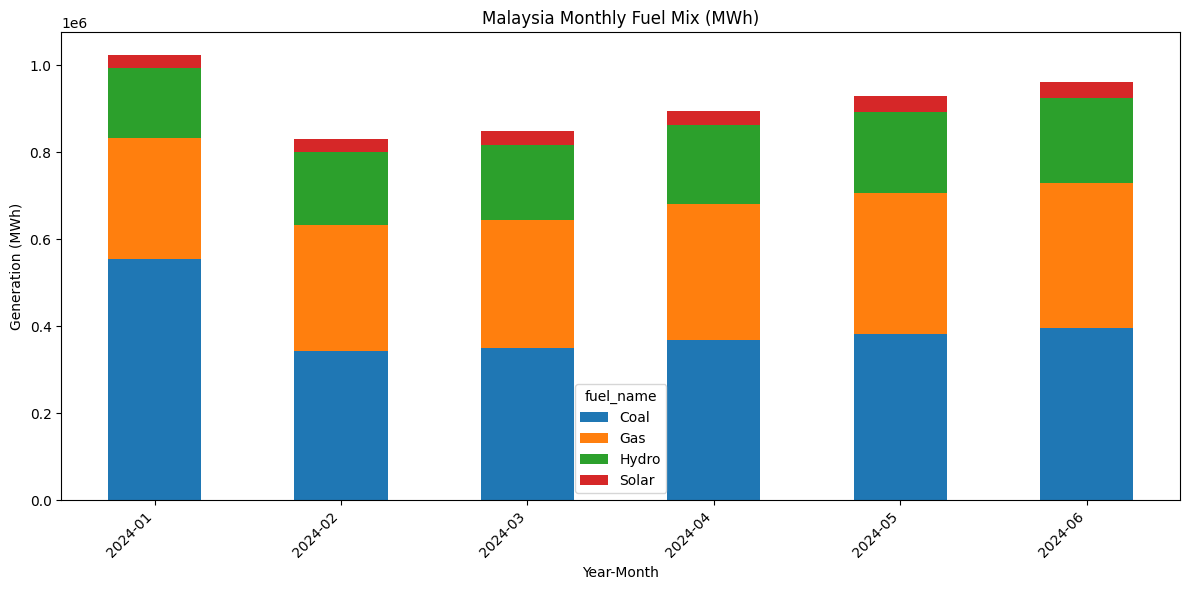

In [2]:
# SQL to get monthly MWh by fuel
query = """
SELECT
    d.year,
    d.month,
    f.fuel_name,
    SUM(g.mwh) AS total_mwh
FROM fact_generation_monthly g
JOIN dim_date_month d ON g.date_id = d.date_id
JOIN dim_fuel f        ON g.fuel_id = f.fuel_id
GROUP BY
    d.year,
    d.month,
    f.fuel_name
ORDER BY
    d.year,
    d.month,
    f.fuel_name;
"""

df = pd.read_sql(query, con)

# Pivot to get one column per fuel
pivot = df.pivot_table(
    index=["year", "month"],
    columns="fuel_name",
    values="total_mwh",
    fill_value=0
)

# Nicer x-axis label: YYYY-MM
pivot.index = pivot.index.map(lambda x: f"{x[0]}-{x[1]:02d}")

ax = pivot.plot(kind="bar", stacked=True, figsize=(12, 6))
ax.set_title("Malaysia Monthly Fuel Mix (MWh)")
ax.set_xlabel("Year-Month")
ax.set_ylabel("Generation (MWh)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()
